In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
from pandas import json_normalize
from scipy import stats

In [2]:
group_by_users_df = pd.read_csv("C:/Users/user/Desktop/GA4_project/totals_group_by_userid.csv")
group_by_users_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_8528\2509627051.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  group_by_users_df = pd.read_csv("C:/Users/user/Desktop/GA4_project/totals_group_by_userid.csv")


,fullVisitorId,country,user_visits,user_pageviews,user_hits,user_newvisits,user_bounces,user_revenues
0,168159078983594,Taiwan,1,56,76,1,0,0
1,174067426171406,Canada,1,25,28,1,0,0
2,197671390269035,United States,1,1,1,1,1,0
3,245437374675368,United States,1,2,2,1,0,0
4,26722803385797,United Kingdom,1,2,3,1,0,0


- 유저별 로그 데이터 총 합 데이터 프레임에서 이상치 제거

In [3]:
# 이상치를 확인하고 싶은 컬럼 선택
columns_to_check_1 = ['user_visits', 'user_pageviews', 'user_hits', 'user_bounces', 'user_revenues']

# 각 컬럼에 대한 Z-점수 계산
z_scores_1 = stats.zscore(group_by_users_df[columns_to_check_1])

# Z-점수가 특정 기준 이상인 행을 이상치로 간주
threshold = 3
user_grouped_df_outliers = (z_scores_1 > threshold).any(axis=1)

# 이상치 제거
user_grouped_df_no_outliers = group_by_users_df[~user_grouped_df_outliers]

# 결과 확인
print("원래 데이터프레임 크기:", group_by_users_df.shape)
print("이상치 제거 후 데이터프레임 크기:", user_grouped_df_no_outliers.shape)

원래 데이터프레임 크기: (716924, 8)
이상치 제거 후 데이터프레임 크기: (703119, 8)


In [4]:
user_grouped_df_no_outliers.to_csv("C:/Users/user/Desktop/GA4_project/user_grouped_df_no_outliers.csv", index=False)

user_grouped_df_no_outliers

,fullVisitorId,country,user_visits,user_pageviews,user_hits,user_newvisits,user_bounces,user_revenues
1,174067426171406,Canada,1,25,28,1,0,0
2,197671390269035,United States,1,1,1,1,1,0
3,245437374675368,United States,1,2,2,1,0,0
4,26722803385797,United Kingdom,1,2,3,1,0,0
5,500012543476818,United States,1,4,4,1,0,0
...,...,...,...,...,...,...,...,...
716919,9999963186378918199,United Kingdom,1,1,1,1,1,0
716920,999997225970956660,United States,1,1,1,1,1,0
716921,999997550040396460,United States,2,3,3,1,1,0
716922,9999978264901065827,United States,1,1,1,1,1,0


In [5]:
group_by_users_df.describe()

,user_visits,user_pageviews,user_hits,user_newvisits,user_bounces,user_revenues
count,716924.000000,716924.000000,716924.000000,716924.000000,716924.000000,7.169240e+05
mean,1.260459,4.851931,5.793745,0.980662,0.628560,2.148165e+06
std,1.392576,13.924231,18.167519,0.151274,0.909285,1.081438e+08
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00
50%,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000e+00
75%,1.000000,4.000000,4.000000,1.000000,1.000000,0.000000e+00
max,278.000000,4160.000000,4995.000000,3.000000,186.000000,7.711343e+10


- 이상치 제거된 데이터 테이블로 상관 관계 확인
- 그나마 pageviews 와 revenue 과 상관 관계가 있는 것으로 확인 (pageviews 와 hits 는 당연한 비례관계이므로 제외)

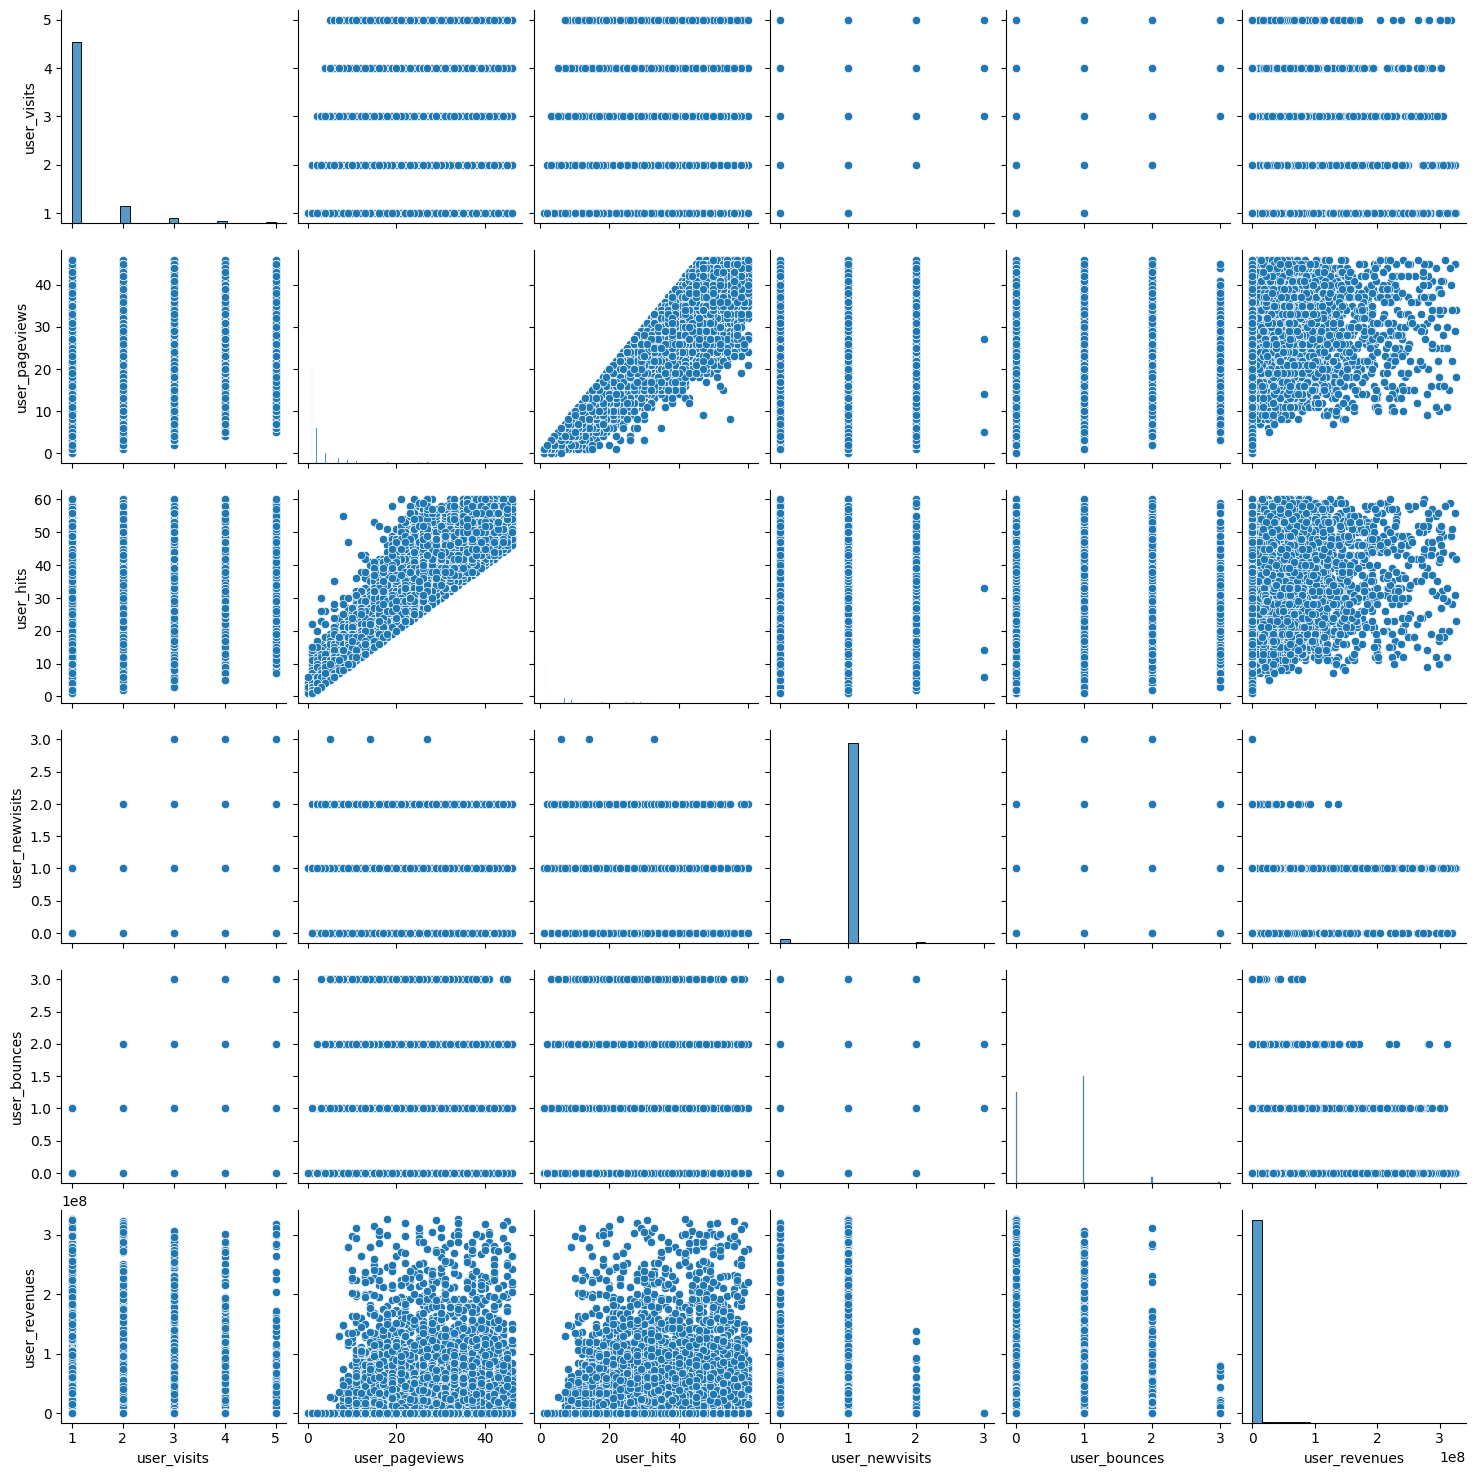

In [8]:
#sns.pairplot(user_grouped_df_no_outliers)

- 전체 유저 수 구하기 - 701501명

In [6]:
# 이상치 제거 후 서로 다른 fullVisitorId 개수 계산
user_grouped_df_no_outliers['fullVisitorId'].nunique()


701501

- 유저별 그룹전 기존 테이블에서 이상치 제거

In [7]:
base_df = pd.read_csv("C:/Users/user/Desktop/GA4_project/preproccessed_df.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_15232\1931070948.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  base_df = pd.read_csv("C:/Users/user/Desktop/GA4_project/preproccessed_df.csv")


In [8]:
# 이상치를 확인하고 싶은 컬럼 선택
columns_to_check_2 = ['user_visits', 'user_pageviews', 'user_hits', 'user_bounces', 'user_revenues']

# 각 컬럼에 대한 Z-점수 계산
base_df_z_scores = stats.zscore(group_by_users_df[columns_to_check_2])

# Z-점수가 특정 기준 이상인 행을 이상치로 간주
threshold = 3
base_df_outliers = (base_df_z_scores > threshold).any(axis=1)

# 이상치 제거
base_df_no_outliers = group_by_users_df[~base_df_outliers]

# 결과 확인
print("원래 데이터프레임 크기:", group_by_users_df.shape)
print("이상치 제거 후 데이터프레임 크기:", base_df_no_outliers.shape)

원래 데이터프레임 크기: (716924, 8)
이상치 제거 후 데이터프레임 크기: (703119, 8)


- 이상치를 제거한 데이터 프레임은 각각 다음의 변수에 저장되어있음

1. base_df_no_outliers (preproccessed_df 에 이상치 제거한 것)

2. user_grouped_df_no_outliners

- 데이터 테이블은 2016-08-01부터 2017-08-02까지 1년간의 데이터를 담고 있음

- user_grouped_df_no_outliers 로부터 1년간 누적 pageviews 가 몇 이상인 유저가 95% 이상의 확률로 수익이 발생하는지 확인

In [20]:
# 주어진 데이터 프레임
features = ['user_visits', 'user_pageviews', 'user_bounces', 'user_hits']
target = 'user_revenues'

# X와 y 선택
X = user_grouped_df_no_outliers[features]
y = user_grouped_df_no_outliers[target]

# user_revenues가 0을 초과하면서 user_pageviews가 0보다 큰 데이터 선택
filtered_data = user_grouped_df_no_outliers[(user_grouped_df_no_outliers['user_revenues'] > 0) & (user_grouped_df_no_outliers['user_pageviews'] > 0)]

# 페이지 방문 횟수를 기준으로 그룹화하여 수익이 발생할 확률 계산
grouped_data = filtered_data.groupby('user_pageviews').size().reset_index(name='total_users')
grouped_data['revenue_probability'] = grouped_data['total_users'].cumsum() / len(filtered_data) * 100

# 결과를 데이터프레임으로 변환
result_df = grouped_data[['user_pageviews', 'revenue_probability']]


result_df.tail(10)

,user_pageviews,revenue_probability
32,37,84.482461
33,38,86.642475
34,39,88.767928
35,40,90.858821
36,41,92.534992
37,42,94.418524
38,43,96.060135
39,44,97.511664
40,45,98.824952
41,46,100.000000


In [21]:
# 교차 검증
user_grouped_df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703119 entries, 1 to 716923
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fullVisitorId   703119 non-null  object
 1   country         703119 non-null  object
 2   user_visits     703119 non-null  int64 
 3   user_pageviews  703119 non-null  int64 
 4   user_hits       703119 non-null  int64 
 5   user_newvisits  703119 non-null  int64 
 6   user_bounces    703119 non-null  int64 
 7   user_revenues   703119 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 48.3+ MB


In [25]:
# user_pageviews가 42 이상인 데이터 추출
filtered_data = user_grouped_df_no_outliers[user_grouped_df_no_outliers['user_pageviews'] >= 46]

# user_revenues가 0을 초과하는 데이터 추출
revenue_greater_than_zero = filtered_data[filtered_data['user_revenues'] > 0]

# user_revenues가 0을 초과하는 데이터 중 user_pageviews의 비율 계산
percentage = (len(revenue_greater_than_zero) / len(filtered_data)) * 100

print(f"user_pageviews가 42 이상인 데이터 중 user_revenues의 값이 0을 초과하는 데이터 비율: {percentage:.2f}%") 


user_pageviews가 42 이상인 데이터 중 user_revenues의 값이 0을 초과하는 데이터 비율: 46.58%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
# user_grouped_df_no_outliers: 주어진 데이터 프레임
# X: Features, y: Target (user_revenues)
X = user_grouped_df_no_outliers[['user_visits', 'user_pageviews', 'user_hits', 'user_newvisits']]
y = user_grouped_df_no_outliers['user_revenues']

# 데이터를 학습 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특징 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 선형 회귀 모델 학습
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# 테스트 세트에서 예측
y_pred = model.predict(X_test_scaled)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy:.2f}')

# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
